# Extended figure 6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import linregress
from PIL import Image
from scipy.stats import mannwhitneyu
import sys

sys.path.append('../..')
from consensus_variables import *

In [12]:
plots_config = {
    "ylabel_fontsize": 8.5,
    "xlabel_fontsize": 8.5,
    "title_fontsize": 8.5,
    "xyticks_fontsize": 7.5,
    "legend_fontsize": 6,
    "annots_fontsize": 5.5
}

In [3]:
impacts = ["missense", "truncating"]

In [4]:
# paths

save_dir = "figs/"

omega_globalloc_dir = os.path.join(deepcsa_run_dir, "omegagloballoc")
shared_muts_file = "../../data/sharedmutations/bladder_shared_mutations_allpairs_separatedByGenes.tsv"
omega_noshared_muts_dir = "/data/bbg/nobackup/bladder_ts/results/2025-05-27_deepCSA_45_donors_depths/custom_omega/outputs/"

## Load data

In [5]:
# load preprocessed shared mutations: 106097 comparisons
shared_muts_df = pd.read_csv(shared_muts_file, sep = "\t")
shared_muts_df

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,gene
0,24_TR,24,trigone,24_TR,24,trigone,320.0,320.0,116.0,116.0,...,25,92,170,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,ALL_GENES
1,14_DO,14,dome,24_TR,24,trigone,608.0,320.0,218.0,116.0,...,0,6,4,0.008696,0.006024,0.013575,0.000000,0.015666,0.010000,ALL_GENES
2,23_DO,23,dome,24_TR,24,trigone,1198.0,320.0,423.0,116.0,...,1,6,8,0.010652,0.001859,0.020408,0.010638,0.009631,0.013889,ALL_GENES
3,40_TR,40,trigone,24_TR,24,trigone,159.0,320.0,52.0,116.0,...,1,5,8,0.021322,0.005988,0.026667,0.024390,0.023256,0.030888,ALL_GENES
4,02_TR,2,trigone,24_TR,24,trigone,988.0,320.0,426.0,116.0,...,1,2,7,0.006154,0.003704,0.004739,0.008000,0.005714,0.012844,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106092,13_TR,13,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106093,06_DO,6,dome,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106094,41_TR,41,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter
106095,27_TR,27,trigone,36_TR,36,trigone,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,TERTpromoter


In [6]:
# load omega globalloc

omega_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_globalloc_dir) if ".tsv" in file_]:
    sample_df = pd.read_csv(f"{omega_globalloc_dir}/{file}", sep = "\t", header = 0)
    sample_df["sample"] = file
    sample_df["modality"] = "globalloc"
    omega_df = pd.concat((omega_df, sample_df)).reset_index(drop = True)

# filter to keep only per sample omega and panel genes, as well as impacts of interest
omega_df_f = omega_df.loc[(omega_df["gene"].isin(panel_all_genes)) &
                        (~omega_df["sample"].str.contains("multi")) & 
                        (omega_df["sample"].str.contains("P19")) &
                        (omega_df["impact"].isin(impacts))]

print(len(omega_df_f["sample"].unique())) # 79 samples

omega_df_f["sample"] = omega_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
omega_df_f["sample"] = omega_df_f["sample"].map(old2new_sample_names)
omega_df_f["donor"] = omega_df_f.apply(lambda row: row["sample"].split("_")[0], axis = 1)
omega_df_f['bladder_loc'] = omega_df_f['sample'].apply(lambda x: 'dome' if 'DO' in x else 'trigone' if 'TR' in x else None)
omega_df_f

79


/tmp/ipykernel_3968137/2158478379.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_df_f["sample"] = omega_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
/tmp/ipykernel_3968137/2158478379.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_df_f["sample"] = omega_df_f["sample"].map(old2new_sample_names)
/tmp/ipykernel_3968137/2158478379.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,modality,donor,bladder_loc
2,CREBBP,36_TR,missense,2,1.275195,0.742182,0.212011,3.961352,globalloc,36,trigone
9,ARID1A,36_TR,missense,1,0.754712,0.768203,0.043454,3.339551,globalloc,36,trigone
11,CDKN1A,36_TR,missense,1,3.483984,0.301423,0.199135,15.422461,globalloc,36,trigone
25,NOTCH2,36_TR,missense,1,0.993848,0.995072,0.057079,4.397778,globalloc,36,trigone
36,RB1,36_TR,missense,1,4.237500,0.243850,0.241707,18.752271,globalloc,36,trigone
...,...,...,...,...,...,...,...,...,...,...,...
124639,KMT2D,15_TR,missense,67,1.931250,0.000003,1.483771,2.475073,globalloc,15,trigone
124643,KMT2D,15_TR,truncating,140,30.887500,0.000000,24.774758,38.291675,globalloc,15,trigone
124652,FOXQ1,15_TR,missense,7,3.226563,0.010212,1.370128,6.350952,globalloc,15,trigone
124654,EP300,15_TR,missense,49,4.687891,0.000000,3.455033,6.214380,globalloc,15,trigone


In [7]:
# load omega global w/o shared mutations

omega_noshared_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_noshared_muts_dir) if "output_mle" in file_]:

    if "log" not in file and "non_shared" in file:
        print(file)
        sample_df = pd.read_csv(f"{omega_noshared_muts_dir}/{file}", sep = "\t", header = 0)
        sample_df["sample"] = file
        omega_noshared_df = pd.concat((omega_noshared_df, sample_df)).reset_index(drop = True)

# filter to keep only per sample omega and panel genes, as well as impacts of interest
omega_noshared_df_f = omega_noshared_df.loc[(omega_noshared_df["gene"].isin(panel_all_genes)) &
                        (~omega_noshared_df["sample"].str.contains("multi")) & 
                        (omega_noshared_df["sample"].str.contains("P19")) &
                        (omega_df["impact"].isin(impacts))]

print(len(omega_noshared_df_f["sample"].unique())) # 68 samples 

omega_noshared_df_f["sample"] = omega_noshared_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
omega_noshared_df_f["sample"] = omega_noshared_df_f["sample"].map(old2new_sample_names)
omega_noshared_df_f["donor"] = omega_noshared_df_f.apply(lambda row: row["sample"].split("_")[0], axis = 1)
omega_noshared_df_f['bladder_loc'] = omega_noshared_df_f['sample'].apply(lambda x: 'dome' if 'DO' in x else 'trigone' if 'TR' in x else None)
omega_noshared_df_f

output_mle.P19_0001_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0001_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0002_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0002_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0004_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0004_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0005_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0005_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0007_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0007_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0008_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0008_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0009_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0009_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0011_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0011_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0012_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0012_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0013_BDO_01.non_shared.global_l

output_mle.P19_0034_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0034_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0040_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0040_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0041_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0041_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0042_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0042_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0045_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0045_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0046_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0046_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0047_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0047_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0050_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0050_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0051_BDO_01.non_shared.global_loc.tsv
output_mle.P19_0051_BTR_01.non_shared.global_loc.tsv
output_mle.P19_0052_BDO_01.non_shared.global_l

/tmp/ipykernel_3968137/4068075718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_noshared_df_f["sample"] = omega_noshared_df_f.apply(lambda row: row["sample"].split(".")[1], axis = 1)
/tmp/ipykernel_3968137/4068075718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_noshared_df_f["sample"] = omega_noshared_df_f["sample"].map(old2new_sample_names)
/tmp/ipykernel_3968137/4068075718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,donor,bladder_loc
0,RBM10,01_DO,missense,1,1.496973,0.705764,0.085510,6.617212,01,dome
2,EP300,01_DO,missense,4,1.879688,0.254783,0.582409,4.394946,01,dome
4,KMT2C,01_DO,missense,1,0.731250,0.741907,0.041696,3.234912,01,dome
9,CDKN1A,01_DO,missense,1,3.956641,0.262580,0.225832,17.515601,01,dome
11,ARID1A,01_DO,missense,7,2.721899,0.023765,1.164014,5.303687,01,dome
...,...,...,...,...,...,...,...,...,...,...
1779,TP53,53_TR,missense,5,4.162500,0.010029,1.487098,8.996484,53,trigone
1781,ARID1A,53_TR,missense,21,1.508594,0.082802,0.944426,2.272144,53,trigone
1783,FOXQ1,53_TR,missense,6,4.075000,0.005455,1.608807,8.357837,53,trigone
1785,CREBBP,53_TR,truncating,2,2.128101,0.344188,0.352330,6.655688,53,trigone


## Fig6a: overlapping mutations between dome and trigone per sample

In [8]:
# subset shared mutations for plot
shared_muts_df_A = shared_muts_df.loc[(shared_muts_df["gene"] == "ALL_GENES") &
(shared_muts_df["sample1_donorID"] == shared_muts_df["sample2_donorID"]) &
(shared_muts_df["sample1"] != shared_muts_df["sample2"]) &
(shared_muts_df["sample1_bladder_location"] == "trigone") &
(shared_muts_df["sample2_bladder_location"] == "dome")].reset_index()

# plot SNVs only
shared_muts_df_A = shared_muts_df_A[["sample1_donorID", "sample1", "sample2", "sample1_bladder_location", 
                                    "sample2_bladder_location", 'sample1_numb_muts_allsnvs', 'sample2_numb_muts_allsnvs',
                                    'numb_shared_muts_allsnvs', "jaccard_index_allsnvs"]]


shared_muts_df_A = shared_muts_df_A.rename({"sample1_donorID": "donorID"}, axis = 1)
shared_muts_df_A["donorID"] = shared_muts_df_A["donorID"].astype(str) 

print(len(shared_muts_df_A)) # 68 samples w/ dome-trigone = 34 comparisons
shared_muts_df_A

34


,donorID,sample1,sample2,sample1_bladder_location,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,numb_shared_muts_allsnvs,jaccard_index_allsnvs
0,14,14_TR,14_DO,trigone,dome,423.0,608.0,38,0.038268
1,23,23_TR,23_DO,trigone,dome,1245.0,1198.0,294,0.136808
2,11,11_TR,11_DO,trigone,dome,447.0,550.0,49,0.051688
3,41,41_TR,41_DO,trigone,dome,289.0,438.0,43,0.062865
4,42,42_TR,42_DO,trigone,dome,655.0,942.0,127,0.086395
5,24,24_TR,24_DO,trigone,dome,320.0,270.0,17,0.029668
6,46,46_TR,46_DO,trigone,dome,279.0,599.0,35,0.041518
7,50,50_TR,50_DO,trigone,dome,1063.0,867.0,188,0.107922
8,33,33_TR,33_DO,trigone,dome,146.0,168.0,21,0.071672
9,8,08_TR,08_DO,trigone,dome,1198.0,797.0,54,0.027821


In [10]:
# unique mutations for each dome and trigone of the same donor
shared_muts_df_A["sample1_numb_unique_muts_allsnvs"] = shared_muts_df_A["sample1_numb_muts_allsnvs"] - shared_muts_df_A["numb_shared_muts_allsnvs"] 
shared_muts_df_A["sample2_numb_unique_muts_allsnvs"] = shared_muts_df_A["sample2_numb_muts_allsnvs"] - shared_muts_df_A["numb_shared_muts_allsnvs"] 

# total mutations of donor
shared_muts_df_A["total_muts_allsnvs"] = shared_muts_df_A["sample1_numb_muts_allsnvs"] + shared_muts_df_A["sample2_numb_muts_allsnvs"]

# calculate percentages
shared_muts_df_A["percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["total_muts_allsnvs"]
shared_muts_df_A["sample1_percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["sample1_numb_muts_allsnvs"]
shared_muts_df_A["sample2_percent_shared_muts_allsnvs"] =  shared_muts_df_A["numb_shared_muts_allsnvs"] * 100 / shared_muts_df_A["sample2_numb_muts_allsnvs"]

# order by total % of shared mutations
shared_muts_df_A = shared_muts_df_A.sort_values(by = "percent_shared_muts_allsnvs", ascending = False).reset_index(drop = True)
shared_muts_df_A

,donorID,sample1,sample2,sample1_bladder_location,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,numb_shared_muts_allsnvs,jaccard_index_allsnvs,sample1_numb_unique_muts_allsnvs,sample2_numb_unique_muts_allsnvs,total_muts_allsnvs,percent_shared_muts_allsnvs,sample1_percent_shared_muts_allsnvs,sample2_percent_shared_muts_allsnvs
0,26,26_TR,26_DO,trigone,dome,685.0,711.0,268,0.237589,417.0,443.0,1396.0,19.197708,39.124088,37.693390
1,29,29_TR,29_DO,trigone,dome,828.0,535.0,214,0.186249,614.0,321.0,1363.0,15.700660,25.845411,40.000000
2,23,23_TR,23_DO,trigone,dome,1245.0,1198.0,294,0.136808,951.0,904.0,2443.0,12.034384,23.614458,24.540902
3,4,04_TR,04_DO,trigone,dome,797.0,843.0,186,0.127923,611.0,657.0,1640.0,11.341463,23.337516,22.064057
4,28,28_TR,28_DO,trigone,dome,701.0,742.0,162,0.126464,539.0,580.0,1443.0,11.226611,23.109843,21.832884
5,5,05_TR,05_DO,trigone,dome,463.0,504.0,106,0.123113,357.0,398.0,967.0,10.961737,22.894168,21.031746
6,52,52_TR,52_DO,trigone,dome,206.0,177.0,39,0.113372,167.0,138.0,383.0,10.182768,18.932039,22.033898
7,50,50_TR,50_DO,trigone,dome,1063.0,867.0,188,0.107922,875.0,679.0,1930.0,9.740933,17.685795,21.683968
8,51,51_TR,51_DO,trigone,dome,895.0,643.0,147,0.105679,748.0,496.0,1538.0,9.557867,16.424581,22.861586
9,15,15_TR,15_DO,trigone,dome,849.0,682.0,122,0.086586,727.0,560.0,1531.0,7.968648,14.369847,17.888563


/tmp/ipykernel_3968137/1059778704.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


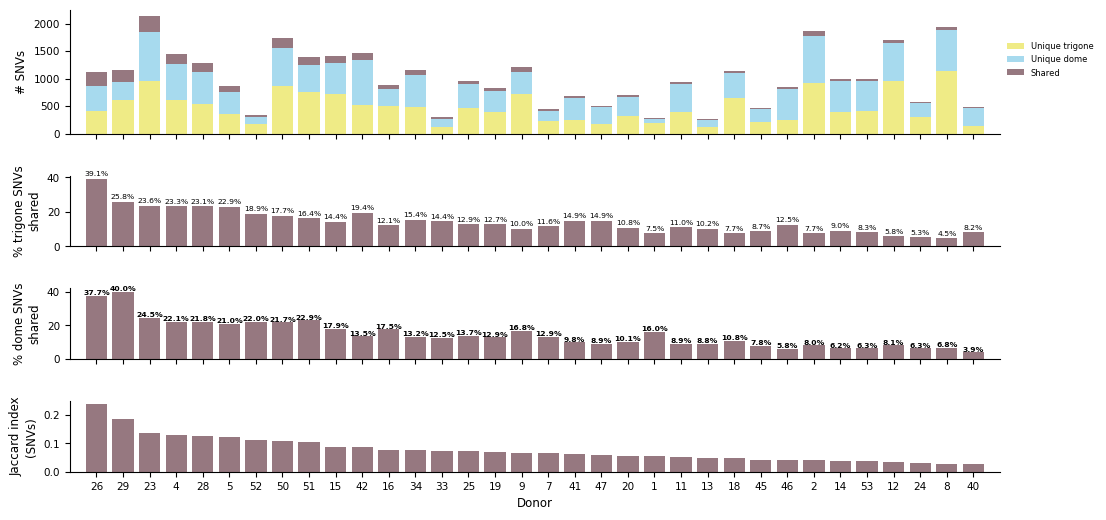

In [ ]:
# general plot configuration
fig, axs = plt.subplots(4, 1, figsize = (12, 6),
                        gridspec_kw = {'height_ratios': [1.75, 1, 1, 1],
                                        'hspace': 0.5},
                        sharex = True)
donors = shared_muts_df_A["donorID"].values
i = 0

# plot 1: trigone unique, dome unique, shared muts (counts)
bottom = np.zeros(len(donors))
levels = ["sample1_numb_unique_muts_allsnvs", "sample2_numb_unique_muts_allsnvs", "numb_shared_muts_allsnvs"]
levels_names = {"Unique trigone": "#EFEB86", "Unique dome": "#A7DAEE", "Shared": "#967880"}

for level, name in zip(levels, levels_names.keys()):
    axs[i].bar(donors, shared_muts_df_A[level], label = name, bottom = bottom, color = levels_names[name])
    bottom += shared_muts_df_A[level]  # Update the bottom position

axs[i].set_ylabel('# SNVs', fontsize = plots_config["ylabel_fontsize"])
axs[i].legend(title = '', fontsize = plots_config["legend_fontsize"], frameon = False, bbox_to_anchor = (1,0.8))
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_config["xyticks_fontsize"])

# plot 2: % trigone muts shared with dome
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["sample1_percent_shared_muts_allsnvs"], bottom = bottom, color = levels_names["Shared"])
for bar, value in zip(bars, shared_muts_df_A["sample1_percent_shared_muts_allsnvs"]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()+1
    axs[i].text(x, y, f"{value:.1f}%", 
                ha = 'center', va = 'bottom',
                fontsize = plots_config["annots_fontsize"], 
                fontweight = "normal")

axs[i].set_ylabel('% trigone SNVs\nshared', fontsize = plots_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_config["xyticks_fontsize"])

# plot 3: % dome muts shared with trigone
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["sample2_percent_shared_muts_allsnvs"], bottom = bottom, color = levels_names["Shared"])
for bar, value in zip(bars, shared_muts_df_A["sample2_percent_shared_muts_allsnvs"]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()+1
    axs[i].text(x, y, f"{value:.1f}%", 
                ha = 'center', va = 'bottom', 
                fontsize = plots_config["annots_fontsize"], 
                fontweight = "normal")

axs[i].set_ylabel('% dome SNVs\nshared', fontsize = plots_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].tick_params(axis='both', labelsize = plots_config["xyticks_fontsize"])

# plot: jaccard index
i += 1
bottom = np.zeros(len(donors))
bars = axs[i].bar(donors, shared_muts_df_A["jaccard_index_allsnvs"], bottom = bottom, color = levels_names["Shared"])
# for bar, value in zip(bars, shared_muts_df_A["jaccard_index_allsnvs"]):
#     axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y(), f"{value:.1f}", 
#                 ha = 'center', va = 'bottom', fontsize = plots_config["annots_fontsize"], fontweight = "bold")

axs[i].set_ylabel('Jaccard index\n(SNVs)', fontsize = plots_config["ylabel_fontsize"])
axs[i].set_xlim(-1, 34)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].set_xlabel('Donor', fontsize = plots_config["xlabel_fontsize"])
axs[i].tick_params(axis='both', labelsize = plots_config["xyticks_fontsize"])

plt.tight_layout()
plt.savefig(f"{save_dir}/extFig6a.png", dpi = 300, bbox_inches = 'tight')
plt.show()


## Fig6b: Similarity between dome and trigone: same donor *vs* different donor - Jaccard index

In [12]:
shared_muts_df_C = shared_muts_df.loc[(shared_muts_df["gene"] == "ALL_GENES") &
(shared_muts_df["sample1"] != shared_muts_df["sample2"])]
shared_muts_df_C

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2,gene
1,DO14,14,dome,TR24,24,trigone,608,320,218,116,...,0.008696,0.006024,0.017647,0.013575,0.000000,0.015666,0.010000,6,2,ALL_GENES
2,DO23,23,dome,TR24,24,trigone,1198,320,423,116,...,0.010652,0.001859,0.028369,0.020408,0.010638,0.009631,0.013889,3,2,ALL_GENES
3,TR40,40,trigone,TR24,24,trigone,159,320,52,116,...,0.021322,0.005988,0.032787,0.026667,0.024390,0.023256,0.030888,4,2,ALL_GENES
4,TR02,2,trigone,TR24,24,trigone,988,320,426,116,...,0.006154,0.003704,0.006803,0.004739,0.008000,0.005714,0.012844,1,2,ALL_GENES
5,DO35,35,dome,TR24,24,trigone,816,320,306,116,...,0.009778,0.004762,0.021164,0.015625,0.000000,0.009828,0.012579,3,2,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,DO05,5,dome,TR36,36,trigone,504,31,186,6,...,0.001873,0.000000,0.000000,0.000000,0.021277,0.007067,0.010811,3,7,ALL_GENES
6236,TR13,13,trigone,TR36,36,trigone,128,31,58,6,...,0.019231,0.000000,0.000000,0.000000,0.086957,0.054545,0.038095,1,7,ALL_GENES
6237,DO06,6,dome,TR36,36,trigone,310,31,116,6,...,0.002941,0.000000,0.000000,0.000000,0.038462,0.010638,0.019608,2,7,ALL_GENES
6238,TR41,41,trigone,TR36,36,trigone,289,31,113,6,...,0.006289,0.000000,0.012500,0.009524,0.032258,0.023923,0.020202,3,7,ALL_GENES


In [13]:
def annot_pair(row):

    if row["sample1_donorID"] == row["sample2_donorID"]:
        return "same_donor"
    else:
        if row["sample1_bladder_location"] == row["sample2_bladder_location"]:
            return f'diff_donor_{row["sample1_bladder_location"]}'
        else:
            return "diff_donor"

shared_muts_df_C["pair"] = shared_muts_df_C.apply(lambda row: annot_pair(row), axis = 1)
shared_muts_df_C

/tmp/ipykernel_3994177/803959918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_muts_df_C["pair"] = shared_muts_df_C.apply(lambda row: annot_pair(row), axis = 1)


,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2,gene,pair
1,DO14,14,dome,TR24,24,trigone,608,320,218,116,...,0.006024,0.017647,0.013575,0.000000,0.015666,0.010000,6,2,ALL_GENES,diff_donor
2,DO23,23,dome,TR24,24,trigone,1198,320,423,116,...,0.001859,0.028369,0.020408,0.010638,0.009631,0.013889,3,2,ALL_GENES,diff_donor
3,TR40,40,trigone,TR24,24,trigone,159,320,52,116,...,0.005988,0.032787,0.026667,0.024390,0.023256,0.030888,4,2,ALL_GENES,diff_donor_trigone
4,TR02,2,trigone,TR24,24,trigone,988,320,426,116,...,0.003704,0.006803,0.004739,0.008000,0.005714,0.012844,1,2,ALL_GENES,diff_donor_trigone
5,DO35,35,dome,TR24,24,trigone,816,320,306,116,...,0.004762,0.021164,0.015625,0.000000,0.009828,0.012579,3,2,ALL_GENES,diff_donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,DO05,5,dome,TR36,36,trigone,504,31,186,6,...,0.000000,0.000000,0.000000,0.021277,0.007067,0.010811,3,7,ALL_GENES,diff_donor
6236,TR13,13,trigone,TR36,36,trigone,128,31,58,6,...,0.000000,0.000000,0.000000,0.086957,0.054545,0.038095,1,7,ALL_GENES,diff_donor_trigone
6237,DO06,6,dome,TR36,36,trigone,310,31,116,6,...,0.000000,0.000000,0.000000,0.038462,0.010638,0.019608,2,7,ALL_GENES,diff_donor
6238,TR41,41,trigone,TR36,36,trigone,289,31,113,6,...,0.000000,0.012500,0.009524,0.032258,0.023923,0.020202,3,7,ALL_GENES,diff_donor_trigone


In [14]:
shared_muts_df_C = shared_muts_df_C.loc[shared_muts_df_C["pair"].isin(["same_donor", "diff_donor"])]

/tmp/ipykernel_3994177/4158841984.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(),
/tmp/ipykernel_3994177/4158841984.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(),


1.4313191420212955e-37
4.665018527792035e-33


/tmp/ipykernel_3994177/4158841984.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(),
/tmp/ipykernel_3994177/4158841984.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(),


4.1215741552577233e-23
1.1351170336085379e-34


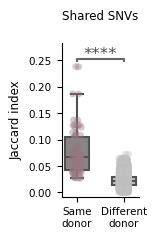

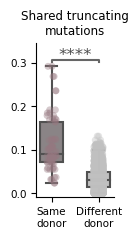

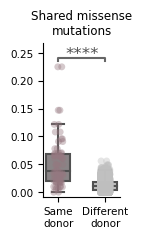

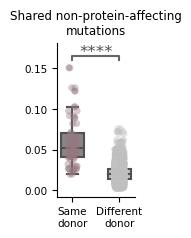

In [15]:
figc_categs = {"same_donor": "Same\ndonor", 
               "diff_donor": "Different\ndonor", # this are only trigone-dome pairs
              # "diff_donor_trigone": "TR-TR\nrandom",
              # "diff_donor_dome": "DO-DO\nrandom"
              }
figc_colors = {"same_donor": "#967880", 
               "diff_donor": "#C0C0C0",
              # "diff_donor_trigone": "#C0C0C0",
              # "diff_donor_dome": "#C0C0C0"
              }

jaccard_idxs = ["jaccard_index_allsnvs", "jaccard_index_truncating", "jaccard_index_missense", "jaccard_index_nonprotaffecting"]
id2title = {"allsnvs": "SNVs\n", "truncating": "truncating\nmutations", "missense": "missense\nmutations",
            "nonprotaffecting": "non-protein-affecting\nmutations"}


for jacc_idx in jaccard_idxs:
    fig, axs = plt.subplots(1, 1, figsize = (1, 2))
    sns.boxplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(), 
                showfliers = False, palette = figc_colors, width = 0.5, saturation = 0.2)
    sns.stripplot(shared_muts_df_C, x = "pair", y = jacc_idx, order = figc_categs.keys(),
                  palette = figc_colors, alpha = 0.4, jitter = 0.1)
    _, pval = mannwhitneyu(shared_muts_df_C.loc[shared_muts_df_C["pair"] == "same_donor"][jacc_idx],
                        shared_muts_df_C.loc[shared_muts_df_C["pair"] == "diff_donor"][jacc_idx])
    print(pval)

    h = 0.005
    y = shared_muts_df_C[jacc_idx].max()+h
    axs.plot([0, 0, 1, 1], [y+h, y+2*h, y+2*h, y+h], lw = 1.5, c = "0.4")
    if pval < 0.0001:
        sig_text = "****"
    elif pval < 0.001:
        sig_text = "***"
    elif pval < 0.01:
        sig_text = "**"
    elif pval < 0.05:
        sig_text = "*"
    else:
        sig_text = "ns"
    axs.text(0.5, y+h, sig_text, ha='center', va='bottom', color="0.3", fontsize=12) 
    
    axs.set_xticklabels(figc_categs.values(), fontsize = plots_config["xyticks_fontsize"])
    axs.set_xlabel("", fontsize = plots_config["xlabel_fontsize"])
    if jacc_idx == "jaccard_index_allsnvs":
        axs.set_ylabel("Jaccard index", fontsize = plots_config["ylabel_fontsize"])
    else: 
        axs.set_ylabel("")
    axs.set_title(f'Shared {id2title[jacc_idx.split("_")[-1]]}', fontsize = plots_config["title_fontsize"])
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.tick_params(axis='both', labelsize = plots_config["xyticks_fontsize"])
    # axs.set_ylim(-0.1, 1)
    # axs.set_yscale("log")
    axs.set_ylim(-0.008, y+y/6)
    plt.savefig(f'{save_dir}/extFig6b_{jacc_idx.split("_")[-1]}.png', dpi = 300, bbox_inches = 'tight')

## Fig6c: Similarity between dome and trigone: same donor *vs* different donor - Pearson correlation

In [ ]:
shared_muts_df_C1 = shared_muts_df.loc[(shared_muts_df["gene"] != "ALL_GENES") &
(shared_muts_df["sample1"] != shared_muts_df["sample2"])]
shared_muts_df_C1 = shared_muts_df_C1.merge(omega_df_f[["gene", "sample", "impact", "dnds"]], right_on = ["gene","sample"],
                                        left_on = ["gene","sample1"]).drop(
    "sample", axis = 1).rename({"dnds": "dnds_sample1"}, axis = 1)
shared_muts_df_C1 = shared_muts_df_C1.merge(omega_df_f[["gene", "sample", "impact", "dnds"]], right_on = ["gene","sample", "impact"],
                                        left_on = ["gene","sample2", "impact"]).drop(
    "sample", axis = 1).rename({"dnds": "dnds_sample2"}, axis = 1)
shared_muts_df_C1 = shared_muts_df_C1.loc[shared_muts_df_C1["impact"].isin(["missense", "truncating"])]
shared_muts_df_C1 = shared_muts_df_C1.loc[shared_muts_df_C1["gene"].isin(panel_all_genes)]
shared_muts_df_C1

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2,gene,impact,dnds_sample1,dnds_sample2
0,DO14,14,dome,TR24,24,trigone,123,80,49,38,...,0.000000,0.0,0.000000,0.000000,6,2,KMT2D,missense,1.209570,1.320508
1,DO23,23,dome,TR24,24,trigone,347,80,117,38,...,0.013245,0.0,0.000000,0.000000,3,2,KMT2D,missense,2.138281,1.320508
2,TR40,40,trigone,TR24,24,trigone,28,80,12,38,...,0.052632,0.0,0.037037,0.000000,4,2,KMT2D,missense,0.955469,1.320508
3,TR02,2,trigone,TR24,24,trigone,225,80,113,38,...,0.000000,0.0,0.000000,0.011765,1,2,KMT2D,missense,1.391406,1.320508
4,DO35,35,dome,TR24,24,trigone,249,80,72,38,...,0.007752,0.0,0.007299,0.000000,3,2,KMT2D,missense,1.385938,1.320508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214688,DO14,14,dome,DO23,23,dome,15,43,5,12,...,0.000000,0.0,0.055556,0.021277,6,3,RB1,truncating,2.383984,3.096877
214792,TR04,4,trigone,TR09,9,trigone,12,38,6,11,...,0.000000,0.0,0.000000,0.000000,3,9,FGFR3,missense,1.420703,1.042578
214795,TR04,4,trigone,TR09,9,trigone,12,38,6,11,...,0.000000,0.0,0.000000,0.000000,3,9,FGFR3,truncating,1.664087,0.848450
214799,TR09,9,trigone,TR04,4,trigone,38,12,11,6,...,0.000000,0.0,0.000000,0.000000,9,3,FGFR3,missense,1.042578,1.420703


In [18]:
shared_muts_df_C1["pair"] = shared_muts_df_C1.apply(lambda row: annot_pair(row), axis = 1)
shared_muts_df_C1 = shared_muts_df_C1.loc[shared_muts_df_C1["pair"].isin(["same_donor", "diff_donor"])]
shared_muts_df_C1

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2,gene,impact,dnds_sample1,dnds_sample2,pair
0,DO14,14,dome,TR24,24,trigone,123,80,49,38,...,0.0000,0.000000,0.000000,6,2,KMT2D,missense,1.209570,1.320508,diff_donor
1,DO23,23,dome,TR24,24,trigone,347,80,117,38,...,0.0000,0.000000,0.000000,3,2,KMT2D,missense,2.138281,1.320508,diff_donor
4,DO35,35,dome,TR24,24,trigone,249,80,72,38,...,0.0000,0.007299,0.000000,3,2,KMT2D,missense,1.385938,1.320508,diff_donor
6,DO11,11,dome,TR24,24,trigone,212,80,72,38,...,0.0625,0.008850,0.019231,6,2,KMT2D,missense,3.062695,1.320508,diff_donor
7,DO41,41,dome,TR24,24,trigone,154,80,35,38,...,0.0000,0.000000,0.000000,3,2,KMT2D,missense,2.303125,1.320508,diff_donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214681,TR43,43,trigone,DO23,23,dome,7,43,1,12,...,0.0000,0.062500,0.023256,3,3,RB1,truncating,3.331253,3.096877,diff_donor
214684,TR53,53,trigone,DO23,23,dome,14,43,6,12,...,0.0000,0.083333,0.025641,4,3,RB1,truncating,6.637402,3.096877,diff_donor
214685,TR12,12,trigone,DO23,23,dome,15,43,4,12,...,0.0000,0.058824,0.021739,2,3,RB1,truncating,1.346094,3.096877,diff_donor
214686,TR20,20,trigone,DO23,23,dome,6,43,2,12,...,0.0000,0.071429,0.027778,5,3,RB1,truncating,4.982031,3.096877,diff_donor


In [19]:
def calc_pearson(group):
    x1 = group["dnds_sample1"]
    y1 = group["dnds_sample2"]
    res = linregress(x = x1, y = y1)
    r_squared = res.rvalue**2
    return r_squared

corr_miss_df = shared_muts_df_C1.loc[shared_muts_df_C1["impact"] == "missense"].groupby(
    ["sample1", "sample2", "pair"]).apply(calc_pearson).reset_index(name = 'pearson_correlation')
corr_trunc_df = shared_muts_df_C1.loc[shared_muts_df_C1["impact"] == "truncating"].groupby(
    ["sample1", "sample2", "pair"]).apply(calc_pearson).reset_index(name = 'pearson_correlation')
corr_trunc_df

/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqr

,sample1,sample2,pair,pearson_correlation
0,DO01,TR01,same_donor,1.000000
1,DO01,TR02,diff_donor,1.000000
2,DO01,TR04,diff_donor,1.000000
3,DO01,TR05,diff_donor,1.000000
4,DO01,TR07,diff_donor,1.000000
...,...,...,...,...
2985,TR53,DO47,diff_donor,0.601455
2986,TR53,DO50,diff_donor,0.904208
2987,TR53,DO51,diff_donor,0.934401
2988,TR53,DO52,diff_donor,0.000000


1.0818399981184526e-07


/tmp/ipykernel_3994177/2304733588.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(corr_miss_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(),


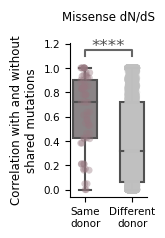

/tmp/ipykernel_3994177/2304733588.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(corr_trunc_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(),


5.259734304449218e-19


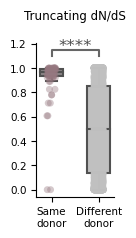

In [22]:
figc_categs = {"same_donor": "Same\ndonor", 
               "diff_donor": "Different\ndonor", # this are only trigone-dome pairs
              # "diff_donor_trigone": "TR-TR\nrandom",
              # "diff_donor_dome": "DO-DO\nrandom"
              }
figc_colors = {"same_donor": "#967880", 
               "diff_donor": "#C0C0C0",
              # "diff_donor_trigone": "#C0C0C0",
              # "diff_donor_dome": "#C0C0C0"
              }

fig, axs = plt.subplots(1, 1, figsize = (1, 2))
sns.boxplot(corr_miss_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(), 
            showfliers = False, palette = figc_colors, width = 0.5, saturation = 0.2)
sns.stripplot(corr_miss_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(),
              palette = figc_colors, alpha = 0.4, jitter = 0.1)
_, pval = mannwhitneyu(corr_miss_df.loc[corr_miss_df["pair"] == "same_donor"]["pearson_correlation"],
                        corr_miss_df.loc[corr_miss_df["pair"] == "diff_donor"]["pearson_correlation"])
print(pval)

h = 0.05
y = corr_miss_df["pearson_correlation"].max()+h
axs.plot([0, 0, 1, 1], [y+h, y+2*h, y+2*h, y+h], lw = 1.5, c = "0.4")
if pval < 0.0001:
    sig_text = "****"
elif pval < 0.001:
    sig_text = "***"
elif pval < 0.01:
    sig_text = "**"
elif pval < 0.05:
    sig_text = "*"
else:
    sig_text = "ns"
axs.text(0.5, y+h+0.02, sig_text, ha='center', va='bottom', color="0.3", fontsize=12) 

axs.set_xticklabels(figc_categs.values(), fontsize = plots_config["xyticks_fontsize"])
axs.tick_params(axis='y', labelsize = plots_config["xyticks_fontsize"])
axs.set_xlabel("")
axs.set_title("Missense dN/dS\n", fontsize = plots_config["title_fontsize"])
axs.set_ylabel("Correlation with and without\nshared mutations", fontsize = plots_config["ylabel_fontsize"])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig(f"{save_dir}/extFig6c_missense.png", dpi = 300, bbox_inches = 'tight')
plt.show()

fig, axs = plt.subplots(1, 1, figsize = (1, 2))
sns.boxplot(corr_trunc_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(), 
            showfliers = False, palette = figc_colors, width = 0.5, saturation = 0.2)
sns.stripplot(corr_trunc_df, x = "pair", y = "pearson_correlation", order = figc_categs.keys(),
              palette = figc_colors, alpha = 0.4, jitter = 0.1)
_, pval = mannwhitneyu(corr_trunc_df.loc[corr_miss_df["pair"] == "same_donor"]["pearson_correlation"],
                        corr_trunc_df.loc[corr_miss_df["pair"] == "diff_donor"]["pearson_correlation"])
print(pval)

h = 0.05
y = corr_trunc_df["pearson_correlation"].max()+h
axs.plot([0, 0, 1, 1], [y+h, y+2*h, y+2*h, y+h], lw = 1.5, c = "0.4")
if pval < 0.0001:
    sig_text = "****"
elif pval < 0.001:
    sig_text = "***"
elif pval < 0.01:
    sig_text = "**"
elif pval < 0.05:
    sig_text = "*"
else:
    sig_text = "ns"
axs.text(0.5, y+h+0.02, sig_text, ha='center', va='bottom', color="0.3", fontsize=12) 

axs.set_xticklabels(figc_categs.values(), fontsize = plots_config["xyticks_fontsize"])
axs.tick_params(axis='y', labelsize = plots_config["xyticks_fontsize"])
axs.set_xlabel("")
axs.set_title("Truncating dN/dS\n", fontsize = plots_config["title_fontsize"])
axs.set_ylabel("", fontsize = plots_config["ylabel_fontsize"])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig(f"{save_dir}/extFig6c_truncating.png", dpi = 300, bbox_inches = 'tight')

## Final figure

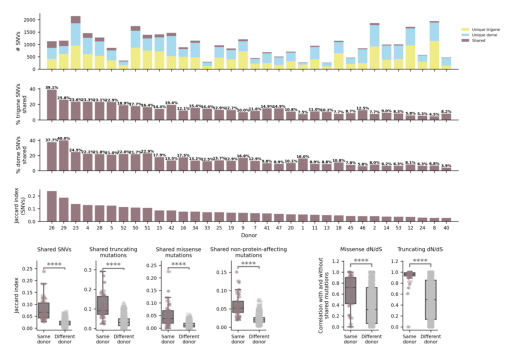

In [23]:
# load images
figA = Image.open(os.path.join(save_dir, "extFig6a.png"))
figB1 = Image.open(os.path.join(save_dir, "extFig6b_allsnvs.png"))
figB2 = Image.open(os.path.join(save_dir, "extFig6b_truncating.png"))
figB3 = Image.open(os.path.join(save_dir, "extFig6b_missense.png"))
figB4 = Image.open(os.path.join(save_dir, "extFig6b_nonprotaffecting.png"))
# figC = Image.open(os.path.join(save_dir, "extFig5c.png"))
figC1 = Image.open(os.path.join(save_dir, "extFig6c_missense.png"))
figC2 = Image.open(os.path.join(save_dir, "extFig6c_truncating.png"))

# height
# fig_height = figA.height + figB1.height + figC.height 
fig_height = figA.height + figB1.height 

# width
fig_width = figA.width

# create canvas
canvas = Image.new('RGB', (fig_width, fig_height), 'white')
sep_rows = 50

# paste images
canvas.paste(figA, (0, 0))
canvas.paste(figB1, (0, figA.height))
canvas.paste(figB2, (figB1.width, figA.height))
canvas.paste(figB3, (figB1.width+figB2.width, figA.height))
canvas.paste(figB4, (figB1.width+figB2.width+figB3.width, figA.height))
# canvas.paste(figC, (0, figA.height+figB1.height))
# canvas.paste(figD1, (figC.width, figA.height+figB1.height))
# canvas.paste(figD2, (figC.width, figA.height+figB1.height+figD1.height))
n = 150
canvas.paste(figC1, (n+figB1.width+figB2.width+figB3.width+figB4.width, figA.height))
canvas.paste(figC2, (n+figB1.width+figB2.width+figB3.width+figB4.width+figC1.width, figA.height))

plt.imshow(canvas)
plt.axis('off')
canvas.save(f'{save_dir}/extFig6.png')
plt.show()